In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **Dataset Publik E-Commerce Brasil oleh Olist**

The dataset has information of 100k orders from 2016 to 2018 made in several markets in Brazil. This is real commercial data, it has been anonymized.
This dataset is generously provided by Olist, the largest department store on the Brazilian market. Olist connects small businesses from all over Brazil to the channel without any hassle and with one contract. The merchant can sell their products through the Olist Store and have them shipped directly to the customer using the Olist logistics partner. Once the customer purchases the product from the Olist Store, the seller will be notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey via email where he or she can provide a note for the purchase experience and some comments.

| Columns Name | Data Type, Length | Description | Present |
| -- | -- | -- | -- |
| customer_id | object | Key to the orders dataset. Each order has a unique customer_id.| Unique customer id to merge with orders dataset |
| customer_unique_id | object | unique identifier of a customer.| represent customer unique id
| customer_zip_code_prefix | int64 | first five digits of customer zip code| represent first five zip code of geolocation customer
| customer_city  |  object |customer city name| a customer city name in brazzil
| customer_state |  object |customer state| represent 2 letters of name customer sate
| geolocation_zip_code_prefix | int64 |first 5 digits of zip code| represent first five zip code of geolocation city and state
| geolocation_lat | float64 |Geolocation latitude| represent of the angular distance of a place north or south of the earth's equator, or of a celestial object north or south of the celestial equator, expressed in degrees.
| geolocation_lng | float64 |Geolocation longitude| the angular distance of a place east or west of the meridian at Greenwich, England, or west of the standard meridian of a celestial object, expressed in degrees.
| geolocation_city |  object |city name| represent of geolocation city name
| geolocation_state |  object |state| represent 2 letter of state where the geolocation is 
| order_id  |  object |order unique identifier| An unique id where every transaction have order id
| order_item_id | int64 |sequential number identifying number of items included in the same order.| A serial number for an unique identifier assigned  sequentially to an item, to uniquely identify it
| product_id  |  object |product unique identifier| A serial number for a unique identifier assigned  to an product, to uniquely identify it
| seller_id | object  |seller unique identifier| A serial number for a unique identifier assigned  to an seller, to uniquely identify it
| shipping_limit_date| object  |Shows the seller shipping limit date for handling the order over to the logistic partner.| the estimated delivery date is when a customer can reasonably expect the order to arrive.
| price | float64 |item price| the retail price of each item of consumer goods.
| freight_value | float64 |item freight value item (if an order has more than one item the freight value is splitted between)|  a price at which a certain cargo is delivered from one point to another
| payment_sequential | int64 |a customer may pay an order with more than one payment method. If he does so, a sequence will be| a sequential pay structure, principal payments are typically allocated to the securities in order of seniority.
| payment_type |  object |method of payment chosen by the customer.| A various of type payment for customer to pay a transaction
| payment_installments | int64 |number of installments chosen by the customer.| Instalment payments refer to a customer paying a bill in small portions throughout a fixed period of time
| payment_value  | float64 | transaction value.| A total of amount money customer need to pay to succesfull transaction

In [3]:
# Change the product name to english
products = pd.read_csv("olist_products_dataset.csv")
prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

In [4]:
#load all the tables
o_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
o_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
o_payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

In [5]:
# Join the needed table
df = orders.merge(o_items, on='order_id', how='left')
df = df.merge(o_payments, on='order_id', how='outer', validate='m:m')
df = df.merge(products, on='product_id', how='outer')
df = df.merge(customers, on='customer_id', how='outer')
df = df.merge(sellers, on='seller_id', how='outer')

In [6]:
# remove columns yang tidak butuh
df = df.drop(axis=1,
columns=['product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date'
,'shipping_limit_date','order_approved_at'])

In [7]:
# Data Sample untuk waktu komputasi lebih cepat 
df_sample = df.sample(10000)

## **Exploratory Data Analysis (EDA)**

## **Data Distribution**

In [8]:
num_features = df.select_dtypes(exclude=[np.object]).columns
df[num_features]

<ipython-input-8-e150e00e078f>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_features = df.select_dtypes(exclude=[np.object]).columns


,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,seller_zip_code_prefix
0,1.0,29.99,8.72,1.0,1.0,18.12,3149,9350.0
1,1.0,29.99,8.72,3.0,1.0,2.00,3149,9350.0
2,1.0,29.99,8.72,2.0,1.0,18.59,3149,9350.0
3,1.0,29.99,7.78,1.0,3.0,37.77,3366,9350.0
4,1.0,29.99,7.78,1.0,1.0,37.77,2290,9350.0
...,...,...,...,...,...,...,...,...
118429,1.0,79.00,14.13,1.0,1.0,93.13,8528,13660.0
118430,1.0,19.70,10.96,1.0,1.0,30.66,89111,89031.0
118431,1.0,399.00,45.07,1.0,1.0,444.07,60455,13478.0
118432,1.0,219.90,24.12,1.0,4.0,244.02,39803,8320.0


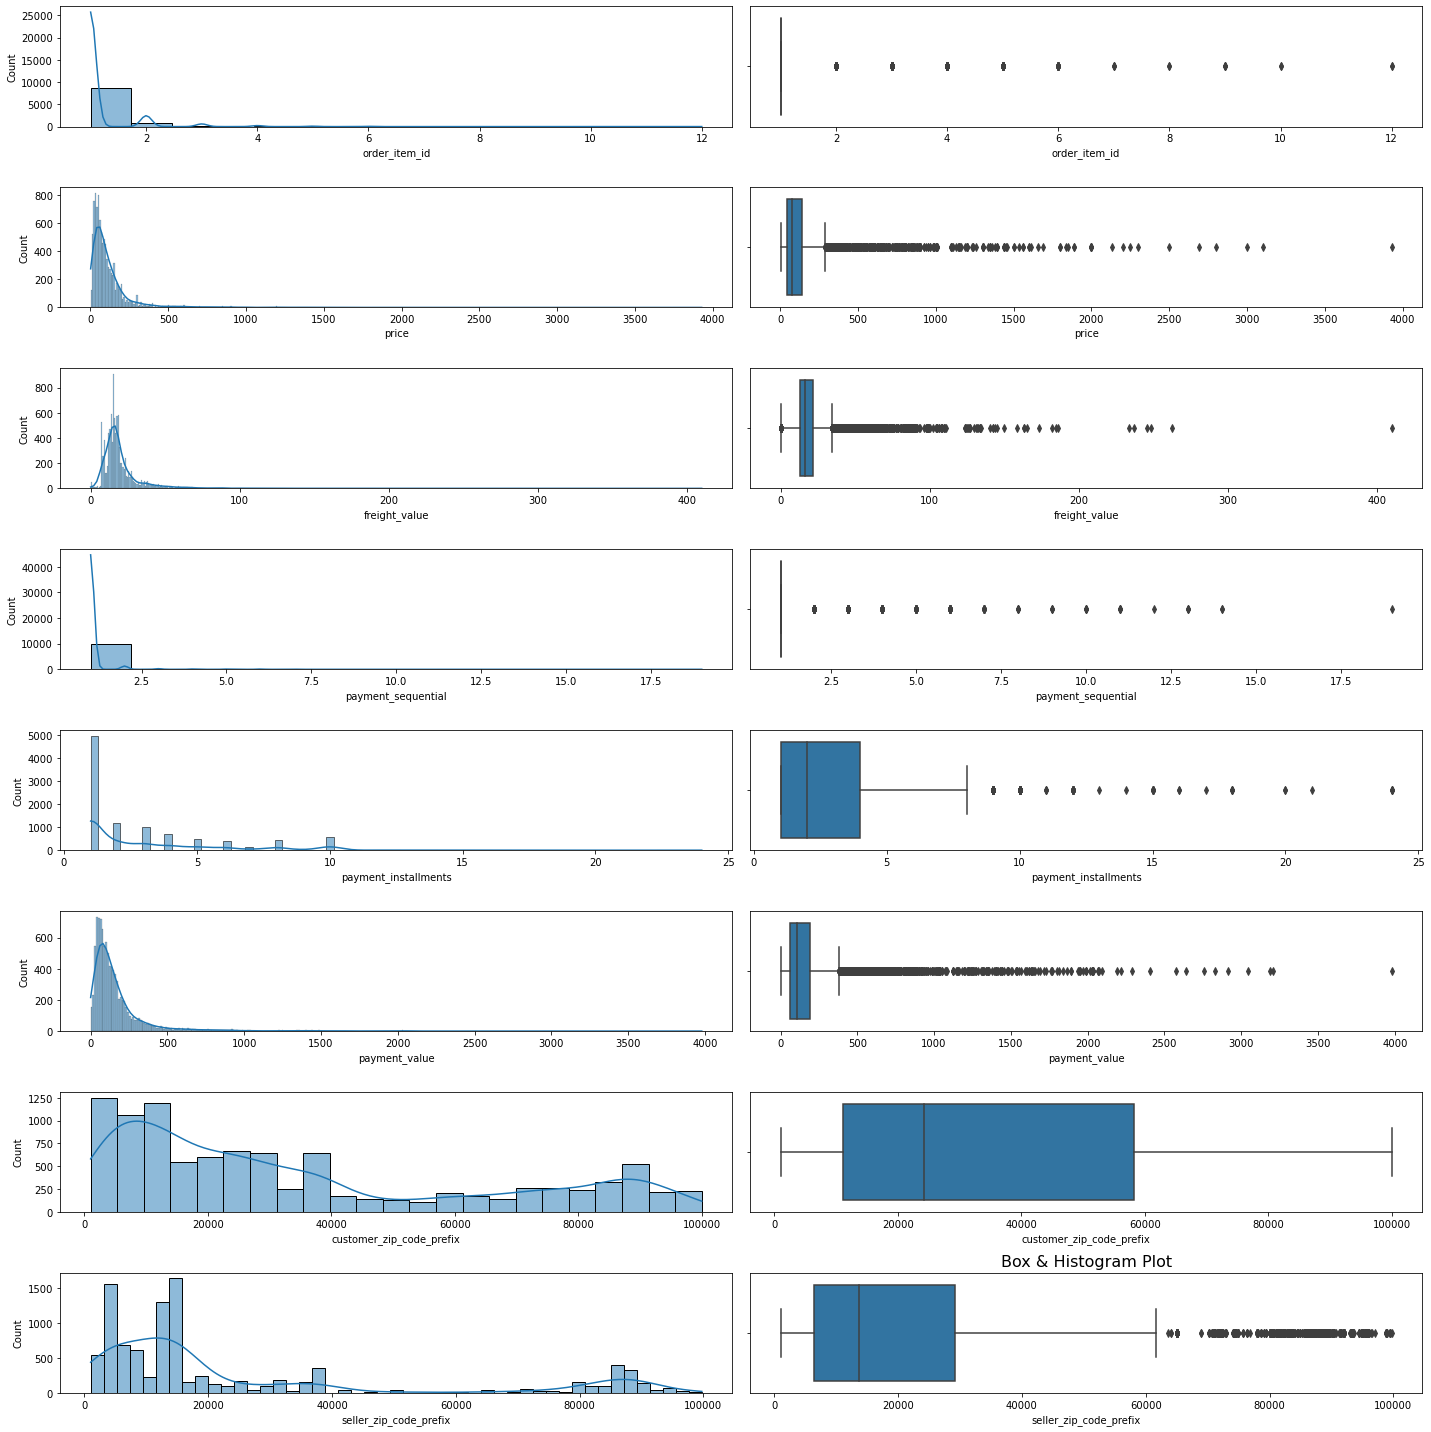

In [9]:
fig, axes = plt.subplots(8, 2, figsize=(20, 20))

for i, var in enumerate(num_features):
    sns.histplot(x=var, data=df_sample, ax=axes[i, 0], kde=True)
    sns.boxplot(x=var, data=df_sample, ax=axes[i, 1])
plt.title('Box & Histogram Plot', size=16)
plt.tight_layout()
plt.show()

## **Data Correlation**

<AxesSubplot:title={'center':'Heatmap'}>

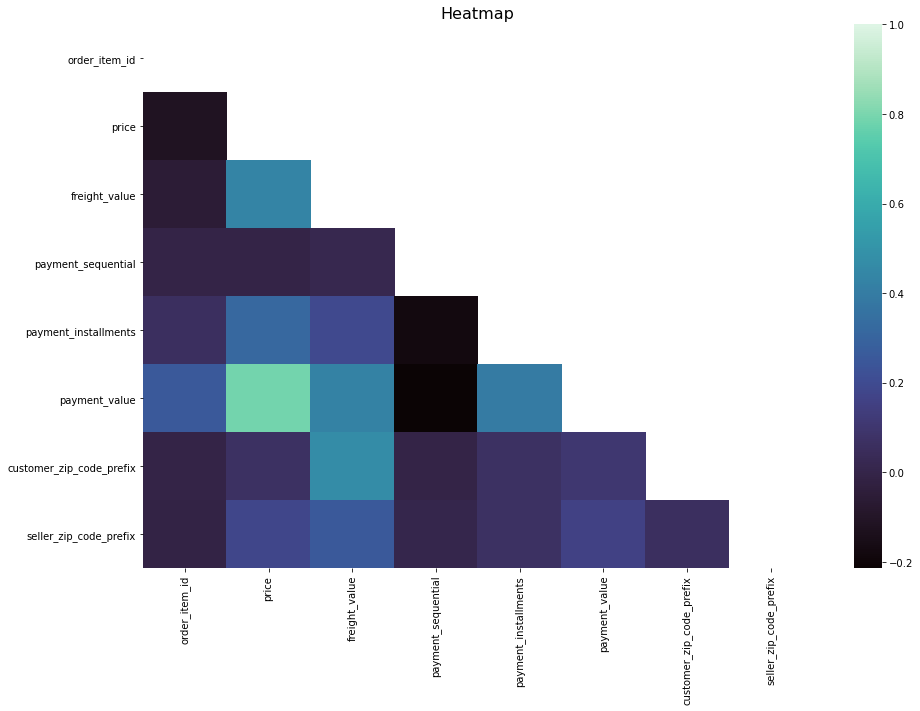

In [10]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 10))
plt.title('Heatmap', size=16)
sns.heatmap(df.corr(method='spearman'), cmap='mako', mask=mask, vmax=1)

## **Data Cardinalities**

In [11]:
exclude = df.drop(columns=['customer_id','order_id','order_purchase_timestamp','product_id','seller_id','customer_unique_id'],axis=1)
cat_features = exclude.select_dtypes(include=[np.object]).columns
df[cat_features].describe()

<ipython-input-11-1c134de196d1>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = exclude.select_dtypes(include=[np.object]).columns


,order_status,payment_type,product_category_name_english,customer_city,customer_state,seller_city,seller_state
count,118434,118431,115881,118434,118434,117604,117604
unique,8,5,71,4119,27,611,23
top,delivered,credit_card,bed_bath_table,sao paulo,SP,sao paulo,SP
freq,115038,87286,11823,18738,49967,29157,83854


In [12]:
for i in cat_features:
    print(f' {i}:', df[i].unique())
    print()

 order_status: ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'created' 'approved']

 payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]

 product_category_name_english: ['housewares' 'baby' 'cool_stuff' 'sports_leisure' 'toys'
 'furniture_decor' 'perfumery' 'health_beauty' 'pet_shop' 'music'
 'computers' 'construction_tools_construction' 'signaling_and_security'
 'auto' 'watches_gifts' 'audio' 'electronics' 'computers_accessories'
 'telephony' 'consoles_games' 'stationery' 'party_supplies' nan
 'fashion_male_clothing' 'fashio_female_clothing' 'food'
 'costruction_tools_tools' 'fashion_bags_accessories' 'garden_tools'
 'office_furniture' 'furniture_living_room' 'market_place'
 'bed_bath_table' 'home_confort' 'art' 'home_construction'
 'air_conditioning' 'agro_industry_and_commerce' 'fixed_telephony'
 'musical_instruments' 'luggage_accessories' 'fashion_sport'
 'fashion_shoes' 'home_appliances' 'small_appliances_home_oven_and_coffee

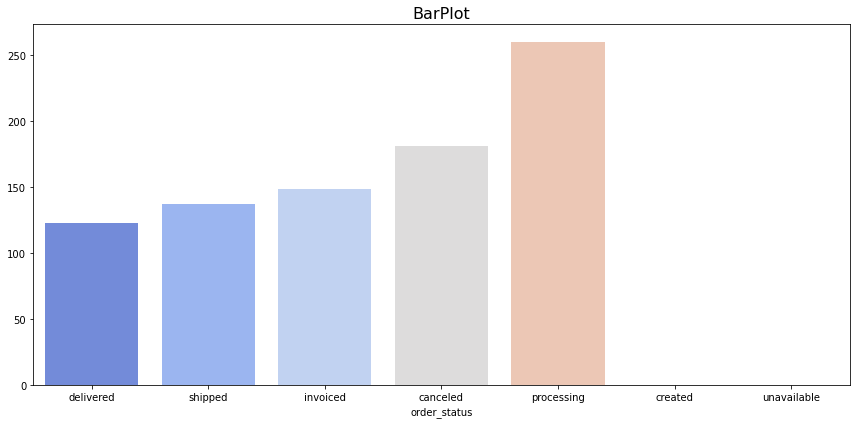

In [13]:
plt.figure(figsize=(12, 6))
df_price_cat = df_sample.groupby('order_status')['price'].mean().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [14]:
top_10_product = df['product_category_name_english'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_product = df[df['product_category_name_english'].isin(top_10_product)]

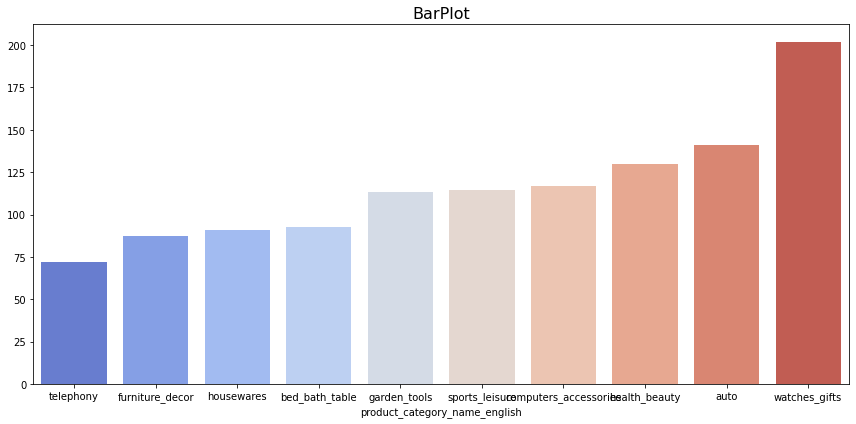

In [15]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_product.groupby('product_category_name_english')['price'].mean().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

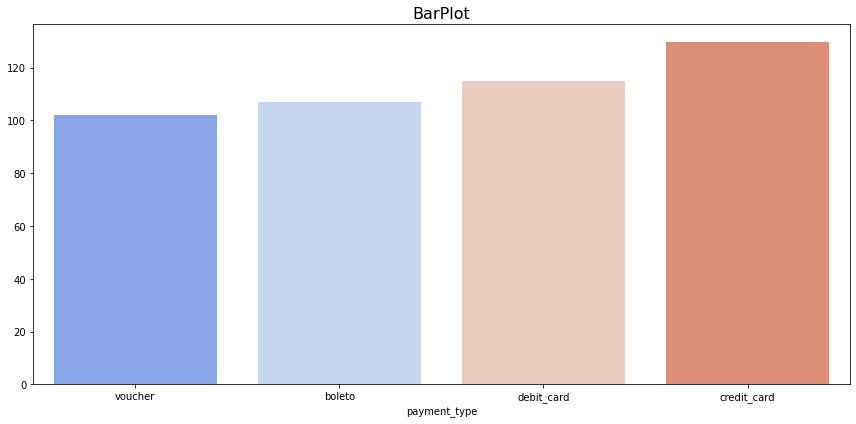

In [16]:
plt.figure(figsize=(12, 6))
df_price_cat = df_sample.groupby('payment_type')['price'].mean().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [17]:
top_10_customer_city = df['customer_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_city = df[df['customer_city'].isin(top_10_customer_city)]

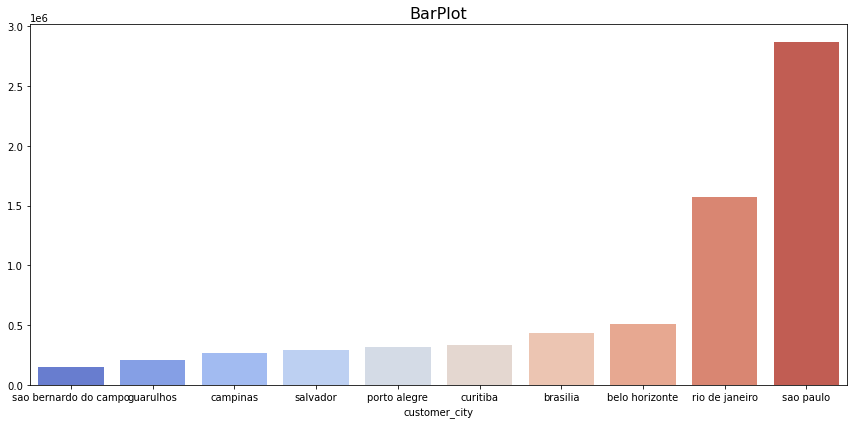

In [61]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_customer_city.groupby('customer_city')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [19]:
top_10_customer_state = df['customer_state'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_state = df[df['customer_state'].isin(top_10_customer_state)]

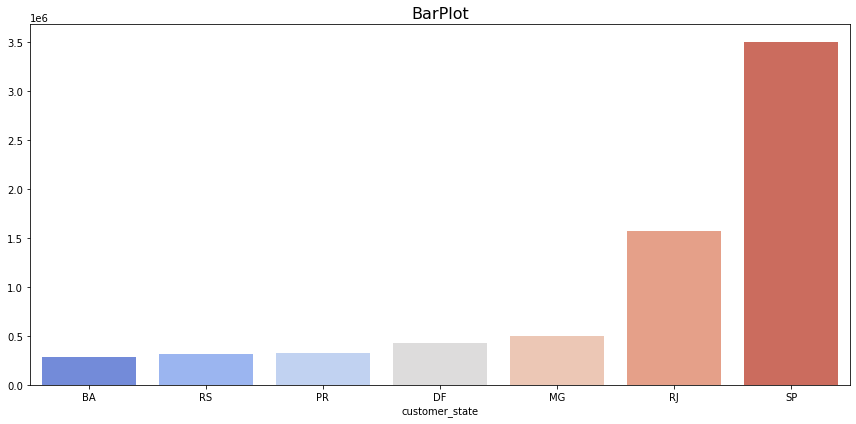

In [62]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_customer_city.groupby('customer_state')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [32]:
# Product termahal
most_expensive_product = df.groupby('product_category_name_english')['price'].max().sort_values(ascending=False).head(10).index
df_most_expensive_product = df[df['product_category_name_english'].isin(most_expensive_product)]

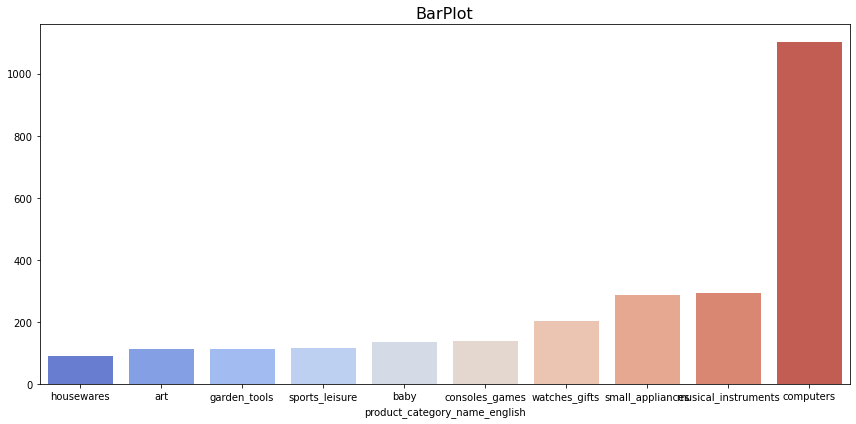

In [35]:
plt.figure(figsize=(12, 6))
df_price_cat = df_most_expensive_product.groupby('product_category_name_english')['price'].mean().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

## **Indentify missing value, outlier,anomaly,duplicates,etc**

In [63]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_item_id                     830
product_id                        830
seller_id                         830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name_english    2553
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            830
seller_city                       830
seller_state                      830
dtype: int64

In [78]:
df[df['seller_id'].isna()]['order_status'].unique() #terdapat masalah seller yang tidak ada id nya paket tidak pernah sampai

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)